<a href="https://colab.research.google.com/github/JayR3d/Personal_Loan_Analysis/blob/main/Personal_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

df = pd.read_csv('Personal_Loans.csv')

Cleaning & Exploring the data

In [ ]:
# View of the raw data
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Personal Loan,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


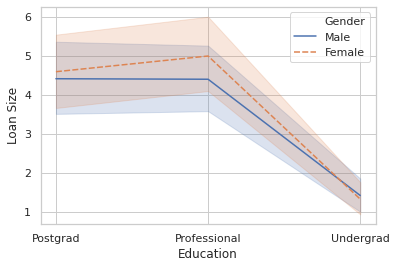

In [ ]:
#Preferable gender and Education Status
sns.set(style="whitegrid")
sns.lineplot(x ='Education',y='Loan Size', data = df,style ='Gender',hue = 'Gender')

In [ ]:
print('DataFrame shape:', df.shape)

DataFrame shape: (4846, 14)


In [ ]:
print('DataFrame columns:', df.columns.tolist())

DataFrame columns: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'Gender', 'Area', 'Personal Loan', 'Loan Size']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4846 non-null   int64  
 1   Experience          4846 non-null   int64  
 2   Income              4846 non-null   int64  
 3   Family              4846 non-null   int64  
 4   CCAvg               4846 non-null   float64
 5   Education           4846 non-null   object 
 6   Mortgage            4846 non-null   int64  
 7   Securities Account  4846 non-null   int64  
 8   CD Account          4846 non-null   int64  
 9   Online              4846 non-null   int64  
 10  Gender              4846 non-null   object 
 11  Area                4846 non-null   object 
 12  Personal Loan       4846 non-null   int64  
 13  Loan Size           4846 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 530.2+ KB


In [ ]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,Personal Loan,Loan Size
count,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000
mean,45.388981,20.169212,73.995047,2.395378,1.942984,56.936236,0.104003,0.060050,0.598019,0.097194,3.229880
std,11.423346,11.363324,46.017608,1.143967,1.745590,102.061477,0.305296,0.237603,0.490349,0.296252,10.303425
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000,50.000000


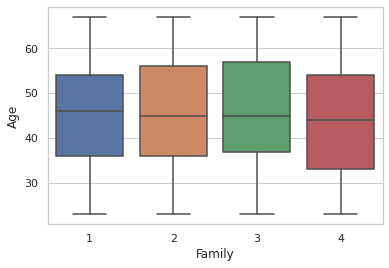

In [ ]:
# Who to market loans to
sns.set(style="whitegrid")
ax = sns.boxplot(x="Family", y="Age", data=df)

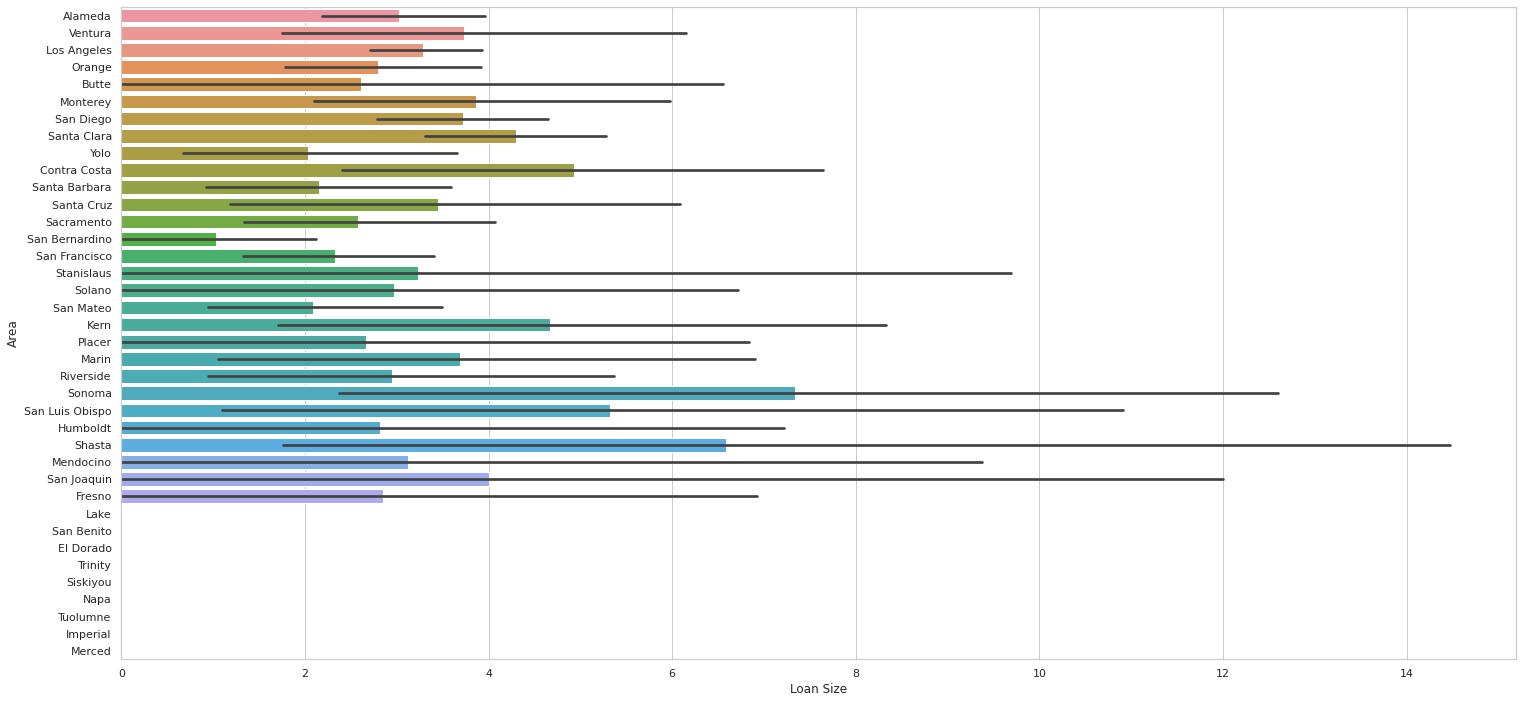

In [ ]:
# Loan Size in contrast to Family Size
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(25, 12))
sns.barplot(x='Loan Size', y='Area', data=df,orient = 'h')

In [ ]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
Gender                0
Area                  0
Personal Loan         0
Loan Size             0
dtype: int64

In [ ]:
# Classification labels
y_c = df['Personal Loan'] # A classification model to Predict whether someone will request a loan or not

# Regression labels
y_r = df['Loan Size'] # A regression model to Predict the size of the loan someone will request

# Features
X = df.drop(['Loan Size', 'Personal Loan'], axis=1)

In [ ]:
# Transform data
X_transformed = pd.get_dummies(X, drop_first=True)

In [ ]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

In [ ]:
# Classification train/test split
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y_c, test_size=0.3, random_state=101)

# Regression train/test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_standardize, y_r, test_size=0.3, random_state=101)

In [ ]:
# Create DMatrix on train data
rtrain = xgb.DMatrix(data= X_train_r,
                     label= y_train_r )

In [ ]:
# Create DMatrix on train data
ctrain = xgb.DMatrix(data= X_train,
                     label= y_train)

In [ ]:
# Linear XGboost model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train_r,y_train_r)
preds = xg_reg.predict(X_test_r)

[09:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.078010


In [ ]:
# XGboost Classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1302
           1       0.95      0.93      0.94       152

    accuracy                           0.99      1454
   macro avg       0.97      0.96      0.96      1454
weighted avg       0.99      0.99      0.99      1454

